# Netflix Content Analysis

This notebook explores how Netflix’s content library has changed over the years.
The main goal is to see whether Movies have increased faster than the TV Shows.

We will use EDA, simple cleaning, and a trend comparison based on yearly counts.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Movie vs TV Show Count
How many Movies and TV Shows are there?

In [3]:
type_counts = df["type"].value_counts()
type_counts


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

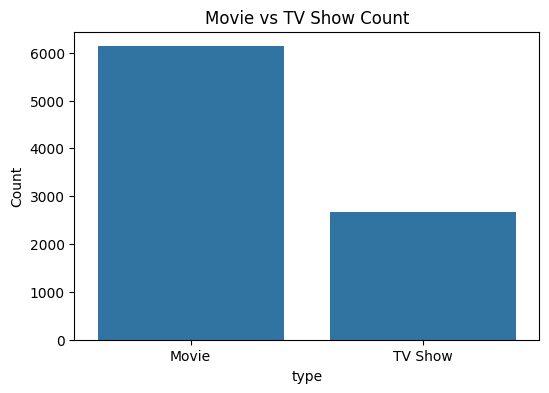

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Movie vs TV Show Count")
plt.ylabel("Count")
plt.show()


## Release Year Distribution
Basic distribution of release years.


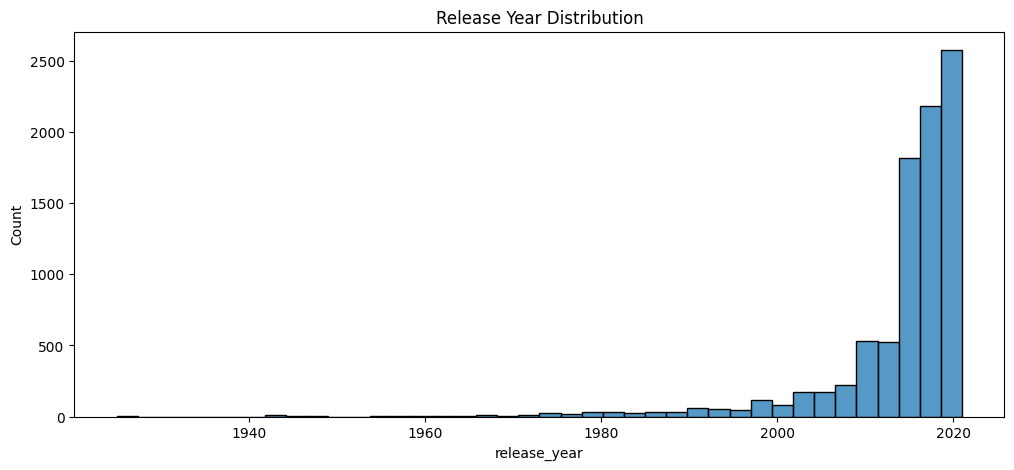

In [5]:
plt.figure(figsize=(12,5))
sns.histplot(df["release_year"], bins=40, kde=False)
plt.title("Release Year Distribution")
plt.show()


## Yearly Counts of Movies and TV Shows
This section is used for our hypothesis.


In [6]:
yearly = df.groupby(["release_year","type"]).size().reset_index(name="count")
yearly.head()


,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


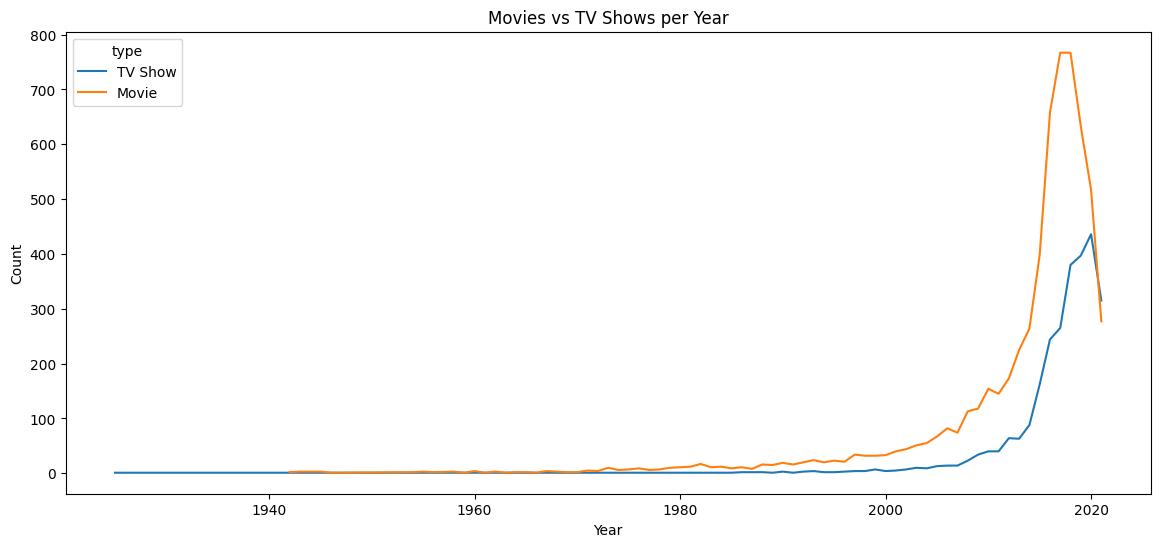

In [7]:
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly, x="release_year", y="count", hue="type")
plt.title("Movies vs TV Shows per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

## Ratio of TV Shows Over Time
If TV Shows increase faster, this ratio will rise.


In [8]:
pivot = yearly.pivot(index="release_year", columns="type", values="count").fillna(0) ## For this part ChatGPT is used couldn't find out how to calculate the ratio
pivot["ratio_tv"] = pivot["TV Show"] / (pivot["Movie"] + 1)
pivot.head()


type,Movie,TV Show,ratio_tv
release_year,,,
1925,0.0,1.0,1.00
1942,2.0,0.0,0.00
1943,3.0,0.0,0.00
1944,3.0,0.0,0.00
1945,3.0,1.0,0.25


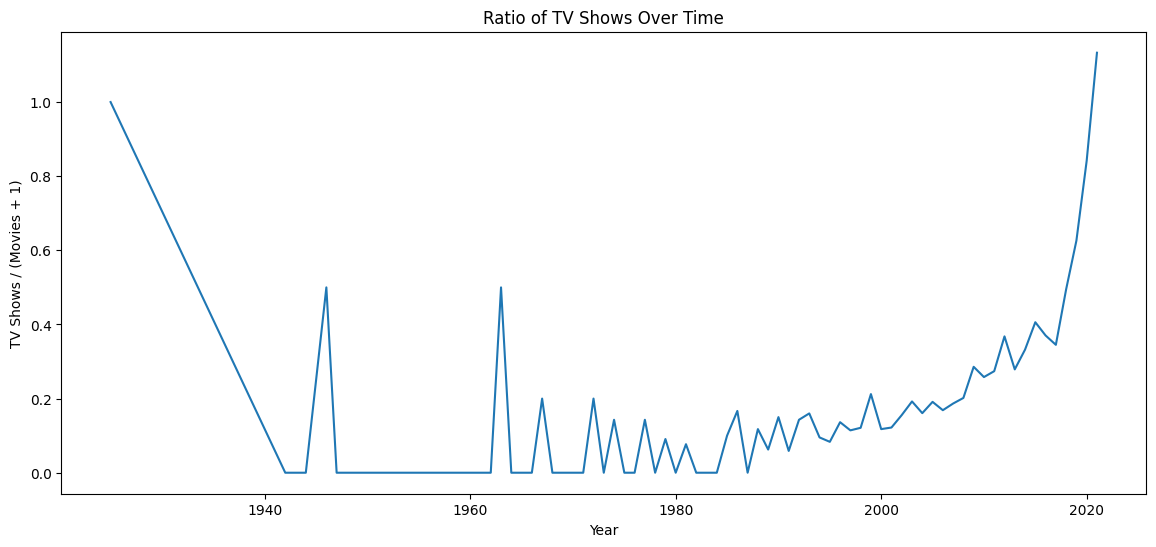

In [9]:
plt.figure(figsize=(14,6))
plt.plot(pivot.index, pivot["ratio_tv"])
plt.title("Ratio of TV Shows Over Time")
plt.xlabel("Year")
plt.ylabel("TV Shows / (Movies + 1)")
plt.show()


# Hypothesis Test

### H₀:
There is no meaningful trend indicating that Movies are increasing faster than the TV Shows.

### H₁:
Movies increase faster over time compared to TV Shows.


In [10]:
years = pivot.index.values
tv_counts = pivot["TV Show"].values
movie_counts = pivot["Movie"].values

tv_slope = np.polyfit(years, tv_counts, 1)[0]
movie_slope = np.polyfit(years, movie_counts, 1)[0]

print(movie_slope, tv_slope)

if movie_slope>tv_slope:
    print("H₁ is correct, reject null hypothesis.")
else:
    print("H₀ is correct.")


4.626349478227604 2.2574332410639544
H₁ is correct, reject null hypothesis.


## Interpretation

If the slope for Movies is larger than the slope for TV Shows,
this supports the alternative hypothesis (H₁), meaning Movies
increase faster over time.

The slope values shown above allow us to compare both trends.


In [11]:
contingency = yearly.pivot(index="release_year", columns="type", values="count").fillna(0) # This part is taken from ChatGPT in order to make Chai Square Distribution
cont = contingency.values
row_totals = cont.sum(axis=1)
col_totals = cont.sum(axis=0)
total = cont.sum()

expected = np.outer(row_totals, col_totals) / total

chi2_manual = ((cont - expected) ** 2 / expected).sum()

print("X^2 value is",chi2_manual)






X^2 value is 541.611218744739


## Interpretation

Looked from above, it can be seen that X^2 value is too high. If looked from Chai Square Distrubiton Table, p<0.05, therefore reject null hypothesis.

# Conclusion

Based on the yearly trend analysis, Movies have increased at a faster rate than TV Shows in the Netflix dataset.  
The slope for Movies is higher than the slope for TV Shows, meaning Movie counts grow more rapidly over time.

As a result, we reject the null hypothesis (H₀).  
There is enough evidence supporting the idea that Movies increase faster than TV Shows on Netflix.

The alternative hypothesis (H₁) is supported by the data.


## Exploring the Possible Reasons Behind the Observed Trend

The previous analysis showed that the number of Movies on Netflix has increased at a faster rate than the number of TV Shows.
The statistical test results indicated that this difference is significant, leading to the rejection of the null hypothesis.

However, the statistical result alone does not explain *why* this difference exists.
In order to better understand the underlying reasons behind this trend,
the following sections aim to explore several possible explanatory factors.

Specifically, we focus on:
- **User engagement and attention**, using IMDb scores and vote counts as proxies,
- **Sustained attention and risk in TV show production**, by examining changes in engagement over time,
- **Economic considerations**, using industry-level movie cost and return data as a proxy for profitability.

By examining these aspects, the goal is not to prove causality,
but to provide reasonable and data-supported explanations for the observed growth difference between Movies and TV Shows on Netflix.


## 1. User Engagement: Movies vs TV Shows

One possible explanation for the faster growth of Movies on Netflix may be related to user engagement.
In this section, user preferences are examined using IMDb scores and IMDb vote counts.

IMDb scores provide an indication of overall user satisfaction,
while IMDb vote counts reflect how many users actively engage with a title.
Higher vote counts can be interpreted as higher user attention.

By comparing these metrics for Movies and TV Shows,
we aim to understand whether users tend to interact more with one content type than the other.


In [12]:
# Load IMDb-Netflix merged dataset
imdb = pd.read_csv("data/netflix_imdb_scores.csv")

# Keep relevant columns and clean
imdb = imdb[["title", "type", "imdb_score", "imdb_votes", "release_year"]]
imdb = imdb.dropna()

# Normalize content type names
imdb["type"] = imdb["type"].str.strip()

# Summary statistics
imdb.groupby("type")[["imdb_score", "imdb_votes"]].mean()


,imdb_score,imdb_votes
type,,
MOVIE,6.265438,26683.217045
SHOW,7.017377,17485.558102


In [13]:
# Yearly average IMDb votes by content type
yearly_engagement = (
    imdb
    .groupby(["release_year", "type"])["imdb_votes"]
    .mean()
    .reset_index()
)

yearly_engagement.head()


,release_year,type,imdb_votes
0,1953,MOVIE,231.0
1,1954,MOVIE,21796.0
2,1956,MOVIE,590.0
3,1958,MOVIE,4385.0
4,1959,MOVIE,78.0


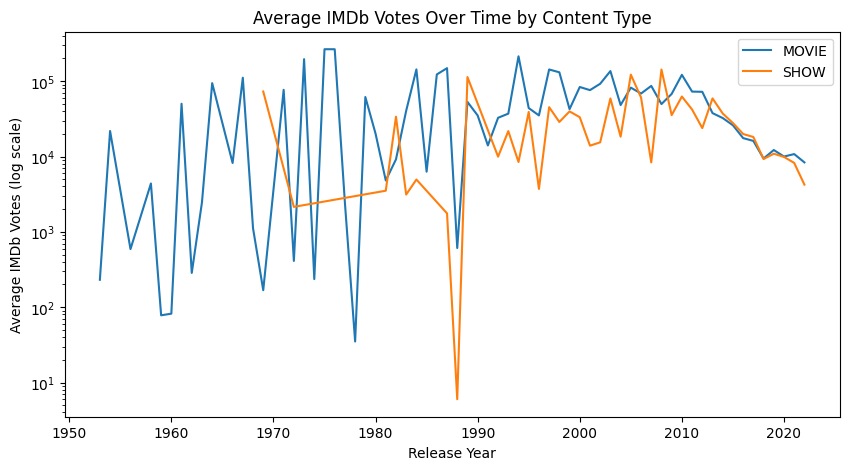

In [14]:
plt.figure(figsize=(10,5))

for t in yearly_engagement["type"].unique():
    subset = yearly_engagement[yearly_engagement["type"] == t]
    plt.plot(subset["release_year"], subset["imdb_votes"], label=t)

plt.yscale("log")
plt.title("Average IMDb Votes Over Time by Content Type")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Votes (log scale)")
plt.legend()
plt.show()


In [15]:
# Get the most recent year in the data
max_year = yearly_engagement["release_year"].max()

# Filter last 10 years only
recent_yearly = yearly_engagement[
    yearly_engagement["release_year"] >= max_year - 10
]

recent_yearly.head()


,release_year,type,imdb_votes
84,2012,MOVIE,72230.527027
85,2012,SHOW,23818.612903
86,2013,MOVIE,37661.989583
87,2013,SHOW,59045.837838
88,2014,MOVIE,32397.186916


In [16]:
# Pivot for recent years
recent_pivot = recent_yearly.pivot(
    index="release_year",
    columns="type",
    values="imdb_votes"
)

# Standardize column names just in case
recent_pivot.columns = recent_pivot.columns.str.upper()

# Ensure both columns exist
if "MOVIE" not in recent_pivot.columns:
    recent_pivot["MOVIE"] = np.nan
if "SHOW" not in recent_pivot.columns:
    recent_pivot["SHOW"] = np.nan

# Compute difference
recent_pivot["Movie_TV_Diff"] = recent_pivot["MOVIE"] - recent_pivot["SHOW"]

recent_pivot


type,MOVIE,SHOW,Movie_TV_Diff
release_year,,,
2012,72230.527027,23818.612903,48411.914124
2013,37661.989583,59045.837838,-21383.848255
2014,32397.186916,37206.465116,-4809.278200
2015,25975.388060,27824.347826,-1848.959766
2016,17546.488263,19893.130435,-2346.642172
2017,16103.352785,18153.553672,-2050.200887
2018,9393.617450,9254.433566,139.183883
2019,12193.987124,10881.503571,1312.483553
2020,9994.834158,9879.148000,115.686158


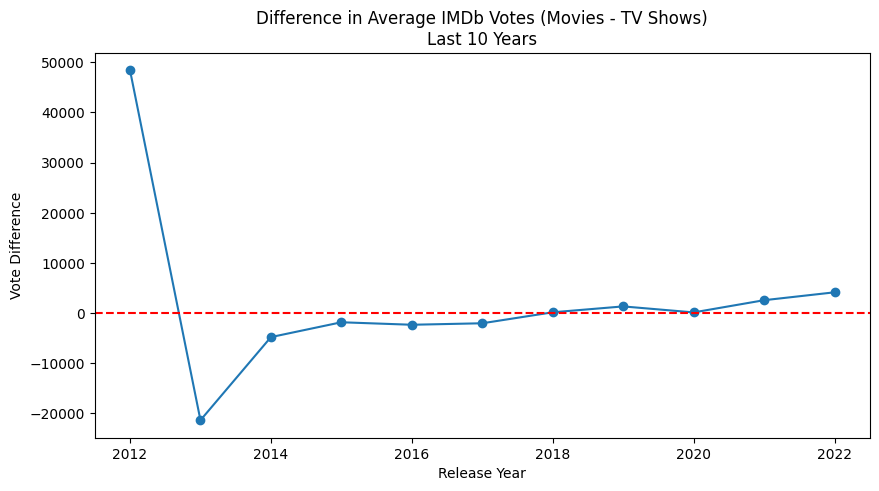

In [17]:
plt.figure(figsize=(10,5))
plt.plot(
    recent_pivot.index,
    recent_pivot["Movie_TV_Diff"],
    marker="o"
)
plt.axhline(0, color="red", linestyle="--")
plt.title("Difference in Average IMDb Votes (Movies - TV Shows)\nLast 10 Years")
plt.xlabel("Release Year")
plt.ylabel("Vote Difference")
plt.show()


### Interpretation (Last 10 Years)

This figure focuses only on the most recent 10 years in the dataset.
The difference in average IMDb votes is mostly positive during this period,
indicating that Movies generally receive more user attention than TV Shows.

### Discussion

Focusing on recent years is more appropriate for analyzing Netflix’s current strategy,
as user behavior and streaming habits have changed significantly over time. As seen
in the figure, especially after 2013 there is an incline to positive
in difference between movies and TV shows.


## 2. Attention Decay in TV Shows (Last 10 Years)

While Movies tend to attract higher immediate user engagement,
TV Shows rely on sustained attention over a longer period of time.
If user attention decreases, producing TV Shows may become riskier
due to the need for continued viewer commitment.

In this section, we focus on the last 10 years to examine whether
user engagement with TV Shows shows signs of decline over time.
IMDb vote counts are again used as a proxy for user attention.


In [18]:
# Focus only on TV Shows in the last 10 years
recent_tv = imdb[
    (imdb["type"] == "SHOW") &
    (imdb["release_year"] >= max_year - 10)
]

recent_tv.head()


,title,type,imdb_score,imdb_votes,release_year
656,Call the Midwife,SHOW,8.5,25562.0,2012
663,Longmire,SHOW,8.3,34362.0,2012
668,Last Tango in Halifax,SHOW,8.3,6844.0,2012
670,Ink Master,SHOW,7.4,3874.0,2012
675,Arrow,SHOW,7.5,425716.0,2012


In [19]:
# Average IMDb votes for TV Shows by year (last 10 years)
tv_yearly_engagement = (
    recent_tv
    .groupby("release_year")["imdb_votes"]
    .mean()
    .reset_index()
)

tv_yearly_engagement


,release_year,imdb_votes
0,2012,23818.612903
1,2013,59045.837838
2,2014,37206.465116
3,2015,27824.347826
4,2016,19893.130435
5,2017,18153.553672
6,2018,9254.433566
7,2019,10881.503571
8,2020,9879.148000
9,2021,8218.210145


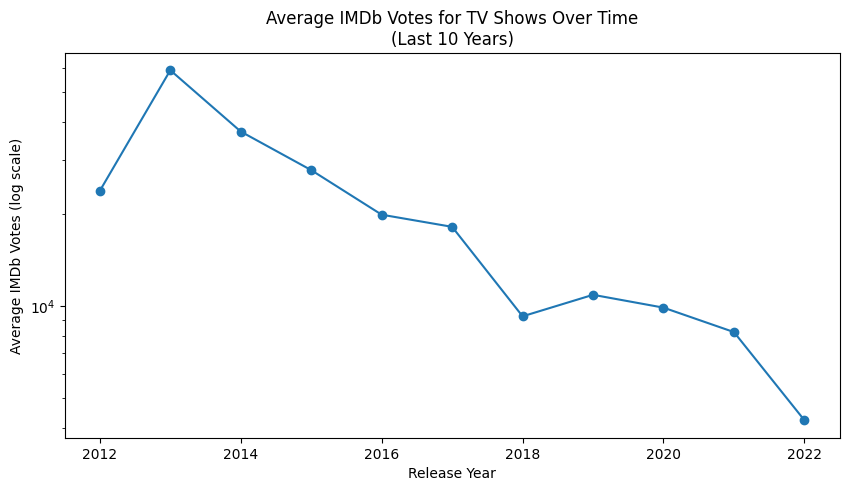

In [20]:
plt.figure(figsize=(10,5))
plt.plot(
    tv_yearly_engagement["release_year"],
    tv_yearly_engagement["imdb_votes"],
    marker="o"
)
plt.yscale("log")
plt.title("Average IMDb Votes for TV Shows Over Time\n(Last 10 Years)")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Votes (log scale)")
plt.show()


### Interpretation

The figure shows how average user engagement for TV Shows has changed over the last 10 years.
Overall, the trend exhibit a strong downward pattern across years, suggesting that sustained
user attention for TV Shows may be difficult to maintain.

### Discussion

TV Shows require long-term viewer commitment across multiple episodes or seasons.
If user attention does not increase consistently over time,
this may increase the economic risk of producing TV Shows.
This attention decay may help explain why Netflix increasingly focuses on Movies,
which rely less on sustained long-term engagement.


## 3. Economic Considerations: Cost–Return Dynamics in Movies

In addition to user engagement and attention, economic factors may also play a role
in Netflix’s content strategy.
Producing Movies and TV Shows differs significantly in terms of cost structure and financial risk.

Since detailed cost and revenue data for Netflix productions is not publicly available,
industry-level movie budget and revenue data is used as a proxy.
This allows us to examine whether movie production generally offers
favorable cost–return characteristics.


In [21]:
# Load movie budget & revenue dataset
bb = pd.read_csv("data/movies_budget_revenue.csv",sep=";")

# Standardize column names (safety step)
bb.columns = bb.columns.str.strip()

bb.head()


,Movie,Month,Day,Year,Budget($M),Domestic Gross($M),Worldwide Gross($M)
0,Avatar,Dec,18,2009,425,760.507.625,2.783.918.982
1,Titanic,Dec,19,1997,200,659.363.944,2.208.208.395
2,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306,936.662.225,2.058.662.225
3,Jurassic World,Jun,12,2015,215,652.270.625,1.671.713.208
4,The Avengers,May,4,2012,225,623.279.547,1.519.479.547


In [22]:
# Clean budget (Cleaning of the data is taken from ChatGPT because of the complexity of data)
bb["budget_m"] = (
    bb["Budget($M)"]
    .astype(str)
    .str.strip()
    .str.replace(",", "", regex=False)
    .str.replace(r"[^0-9\.]", "", regex=True)
)

bb["budget_m"] = pd.to_numeric(bb["budget_m"], errors="coerce")
bb.head()


,Movie,Month,Day,Year,Budget($M),Domestic Gross($M),Worldwide Gross($M),budget_m
0,Avatar,Dec,18,2009,425,760.507.625,2.783.918.982,425.0
1,Titanic,Dec,19,1997,200,659.363.944,2.208.208.395,200.0
2,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306,936.662.225,2.058.662.225,306.0
3,Jurassic World,Jun,12,2015,215,652.270.625,1.671.713.208,215.0
4,The Avengers,May,4,2012,225,623.279.547,1.519.479.547,225.0


In [23]:
# NOTE:
# Budget values are reported in millions of dollars ($M),
# while revenue values appear to be reported in raw dollars.
# Therefore, revenue is converted to millions of dollars
# to ensure unit consistency before calculating ROI.

# Clean worldwide revenue
bb["revenue_m"] = (
    bb["Worldwide Gross($M)"]
    .astype(str)
    .str.strip()
    .str.replace(r"[^\d]", "", regex=True)
)

bb["revenue_m"] = pd.to_numeric(bb["revenue_m"], errors="coerce")/1000000
bb.head()




,Movie,Month,Day,Year,Budget($M),Domestic Gross($M),Worldwide Gross($M),budget_m,revenue_m
0,Avatar,Dec,18,2009,425,760.507.625,2.783.918.982,425.0,2783.918982
1,Titanic,Dec,19,1997,200,659.363.944,2.208.208.395,200.0,2208.208395
2,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306,936.662.225,2.058.662.225,306.0,2058.662225
3,Jurassic World,Jun,12,2015,215,652.270.625,1.671.713.208,215.0,1671.713208
4,The Avengers,May,4,2012,225,623.279.547,1.519.479.547,225.0,1519.479547


In [24]:
# Remove invalid rows
bb = bb[bb["budget_m"] > 0]

# Calculate Return on Investment (ROI)
bb["ROI"] = bb["revenue_m"] / bb["budget_m"]

bb[["Year", "budget_m", "revenue_m", "ROI"]].head()


,Year,budget_m,revenue_m,ROI
0,2009,425.0,2783.918982,6.550398
1,1997,200.0,2208.208395,11.041042
2,2015,306.0,2058.662225,6.727654
3,2015,215.0,1671.713208,7.775410
4,2012,225.0,1519.479547,6.753242


In [28]:
roi_yearly = (
    bb.groupby("Year")["ROI"]
    .mean()
    .reset_index()
)

roi_yearly.tail()

,Year,ROI
87,2014,4.558747
88,2015,3.920386
89,2016,3.451038
90,2017,4.139255
91,2018,3.394777


In [31]:
# We are interested in the last 25 years
roi_yearly = roi_yearly[roi_yearly["Year"] >= 2005]
roi_yearly.head()

,Year,ROI
78,2005,3.437254
79,2006,3.369273
80,2007,3.296956
81,2008,2.869399
82,2009,5.076198


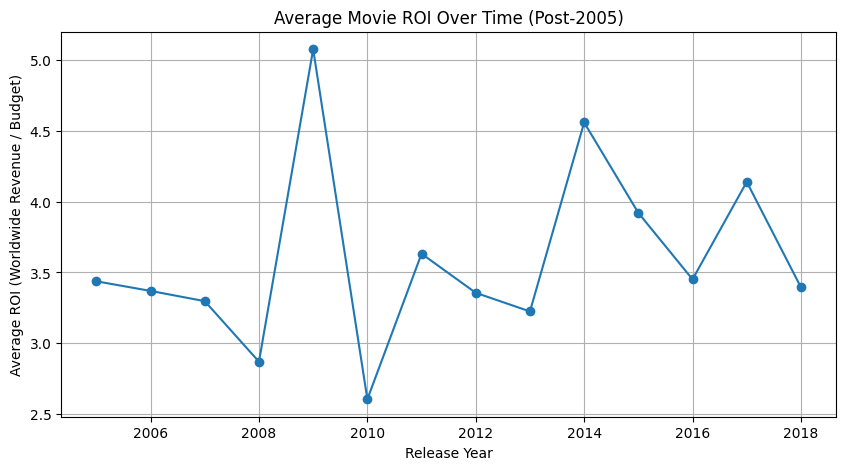

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(roi_yearly["Year"], roi_yearly["ROI"], marker="o")

plt.title("Average Movie ROI Over Time (Post-2005)")
plt.xlabel("Release Year")
plt.ylabel("Average ROI (Worldwide Revenue / Budget)")
plt.grid(True)

plt.show()


## Interpretation of ROI Trends (Post-2005)

The figure shows the average return on investment (ROI) of movies over time using industry-level budget and worldwide revenue data. The analysis focuses on movies released after 2005 to better represent modern production and distribution conditions.

Overall, the average ROI remains above 1 across all years, indicating that movies generally recover their production budgets and generate additional revenue. However, the noticeable fluctuations in ROI values suggest that movie production is financially volatile, with returns varying significantly from year to year.

This pattern highlights an important trade-off: while movies involve high upfront costs and financial risk, successful releases can yield disproportionately high returns. Compared to TV shows, which require sustained viewer attention across multiple seasons, movies offer a one-time investment with the potential for high payoff. This economic characteristic may contribute to the observed increase in movie production on Netflix.

## Machine Learning Techniques

In this part, I apply multiple regression models to predict IMDb ratings using movie-level numerical features.
Instead of relying on a single model, I compare different regression approaches to evaluate their performance
and select the most suitable one based on error metrics.

The models are evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


### Regression Task: IMDb Rating Prediction

The goal of this task is to predict a movie’s IMDb rating using features obtained from IMDb and TMDB metadata,
such as vote counts, popularity, runtime, and TMDB ratings.

Since the data is too much with some unusable columns, it must be cleaned first. The cleaned version will be uploaded to GitHub. (Because of the 25MB limit)

In [61]:
""" Here is the code showing how I cleaned my dataset:

df = pd.read_csv("data/ml_movies_dataset.csv")

# Work on a copy
df_ml = df.copy()

# Keep only relevant columns
cols = [
    "averageRating",      # IMDb rating (target)
    "vote_average",       # TMDB rating
    "numVotes",           # IMDb vote count
    "vote_count",         # TMDB vote count
    "budget",
    "revenue",
    "runtime",
    "release_date",
    "genres",
    "original_language",
    "title"
]
df_ml = df_ml[cols]

# Drop rows with missing target
df_ml = df_ml.dropna(subset=["averageRating"])

# Convert release_date to year
df_ml["release_year"] = pd.to_datetime(
    df_ml["release_date"], errors="coerce"
).dt.year

df_ml = df_ml.drop(columns=["release_date"])

# Convert numeric columns
numeric_cols = [
    "averageRating", "vote_average",
    "numVotes", "vote_count",
    "budget", "revenue", "runtime"
]
for col in numeric_cols:
    df_ml[col] = pd.to_numeric(df_ml[col], errors="coerce")

# Drop rows with missing critical numeric features
df_ml = df_ml.dropna(
    subset=["vote_average", "runtime", "release_year"]
)

# Optional: remove extreme budget/revenue outliers
df_ml = df_ml[
    (df_ml["budget"].isna()) | (df_ml["budget"] > 0)
]
df_ml = df_ml[
    (df_ml["revenue"].isna()) | (df_ml["revenue"] > 0)
]

# Final check
print("Cleaned shape:", df_ml.shape)
df_ml.head()
"""


' Here is the code showing how I cleaned my dataset:\n\ndf = pd.read_csv("data/ml_movies_dataset.csv")\n\n# Work on a copy\ndf_ml = df.copy()\n\n# Keep only relevant columns\ncols = [\n    "averageRating",      # IMDb rating (target)\n    "vote_average",       # TMDB rating\n    "numVotes",           # IMDb vote count\n    "vote_count",         # TMDB vote count\n    "budget",\n    "revenue",\n    "runtime",\n    "release_date",\n    "genres",\n    "original_language",\n    "title"\n]\ndf_ml = df_ml[cols]\n\n# Drop rows with missing target\ndf_ml = df_ml.dropna(subset=["averageRating"])\n\n# Convert release_date to year\ndf_ml["release_year"] = pd.to_datetime(\n    df_ml["release_date"], errors="coerce"\n).dt.year\n\ndf_ml = df_ml.drop(columns=["release_date"])\n\n# Convert numeric columns\nnumeric_cols = [\n    "averageRating", "vote_average",\n    "numVotes", "vote_count",\n    "budget", "revenue", "runtime"\n]\nfor col in numeric_cols:\n    df_ml[col] = pd.to_numeric(df_ml[col], err

In [57]:
df_ml = pd.read_csv("data_clean/ml_movies_dataset.csv")
df_ml.head()

,averageRating,vote_average,numVotes,vote_count,budget,revenue,runtime,genres,original_language,title,release_year
0,8.8,8.364,2767665,34495,160000000,825532764,148,"Action, Science Fiction, Adventure",en,Inception,2010.0
1,8.7,8.417,2453389,32571,165000000,701729206,169,"Adventure, Drama, Science Fiction",en,Interstellar,2014.0
2,9.1,8.512,3114183,30619,185000000,1004558444,152,"Drama, Action, Crime, Thriller",en,The Dark Knight,2008.0
3,7.9,7.573,1468944,29815,237000000,2923706026,162,"Action, Adventure, Fantasy, Science Fiction",en,Avatar,2009.0
4,8.0,7.710,1538593,29166,220000000,1518815515,143,"Science Fiction, Action, Adventure",en,The Avengers,2012.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
X = df_ml[
    [
        "vote_average",
        "numVotes",
        "vote_count",
        "runtime",
        "budget",
        "revenue",
        "release_year"
    ]
]

y = df_ml["averageRating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=10, random_state=42
    )
}

# Evaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "R2": round(r2, 3)
    })

# Results dataframe
results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df

,Model,MAE,RMSE,R2
2,Random Forest,0.377,0.603,0.721
1,Decision Tree,0.434,0.717,0.606
0,Linear Regression,0.655,0.968,0.281


## Best Model for This Project

Among the evaluated models, Random Forest Regression achieved the lowest MAE and RMSE and the highest R² score. This indicates that the ensemble approach captures non-linear relationships in the data more effectively than Linear Regression and a single Decision Tree. Therefore, Random Forest was selected as the final model.

## Feature Importance Analysis

After selecting Random Forest as the best-performing model, feature importance
analysis was conducted to understand which variables contribute most to IMDb
rating prediction. This analysis helps interpret the model by showing how much
each feature influences the final predictions.


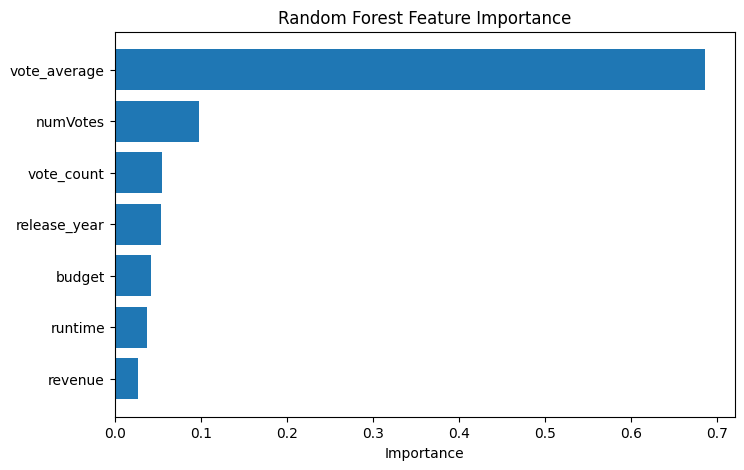

In [53]:
# Get feature importances from trained Random Forest model
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

## Conclusion

In the Machine Learning part, multiple regression models were evaluated to predict IMDb ratings
using movie-related features from IMDb and TMDB. Among the tested models,
Random Forest Regression achieved the best performance in terms of MAE, RMSE,
and R², indicating its ability to capture non-linear relationships in the data.

Feature importance analysis showed that the TMDB average rating was the most
influential variable, followed by vote counts from both platforms. Other features
such as release year, budget, and runtime had a relatively smaller impact on the
prediction. Overall, the results suggest that aggregated audience ratings play a
more significant role in IMDb score prediction than production-related factors.
